# Autor: Aaron Frias

# EVALUACIÓN DEL ESTADO DE SALUD DE UN BEBÉ DURANTE EL PARTO

En este dataset podemos observar ciertas métricas sobre el estado de salud de un bebé durante el parto.
Vamos a realizar un análisis profundo sobre los datos para poder obtener información que pueda ser de utilidad para el personal sanitario.

In [1]:
# IMPORTACION DE LIBRERIAS
import numpy as np
import pandas as pd

# LIBRERIAS PARA HACER GRAFICOS
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

In [2]:
# 2 - CARGA DEL FICHERO DE DATOS
file = '/content/ASI_casoPractico.csv'
data = pd.read_csv(file, sep = ';')
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


# Análisis del Conjunto de Datos

#Explicación de las variables:
* **ID**: Identificación
* **b**: Tiempo de inicio
* **e**: Tiempo de fin
* **LBE**: Frecuencia cardíaca basal fetal (latidos por minuto)
* **AC**: Número de aceleraciones por segundo
* **FM**: Número de movimientos fetales por segundo
* **UC**: Número de contracciones uterinas por segundo
* **ASTV**: Porcentaje de tiempo con variabilidad a corto plazo anormal
* **MSTV**: Valor medio de la variabilidad a corto plazo
* **ALTV**: Porcentaje de tiempo con variabilidad a largo plazo anormal
* **MLTV**: Valor medio de la variabilidad a largo plazo
* **DL**: Número de deceleraciones leves por segundo
* **DS**: Número de deceleraciones severas por segundo
* **DP**: Número de deceleraciones prolongadas por segundo
* **DR**: Número de deceleraciones repetitivas por segundo
* **Width**: Ancho del histograma de la frecuencia cardíaca fetal (FHR)
* **Min**: Mínimo (frecuencia baja) del histograma de FHR
* **Max**: Máximo (frecuencia alta) del histograma de FHR
* **Nmax**: Número de picos en el histograma
* **Nzeros**: Número de ceros en el histograma
* **Mode**: Modo del histograma
* **Mean**: Media del histograma
* **Median**: Mediana del histograma
* **Variance**: Varianza del histograma
* **Tendency**: Tendencia del histograma
* **Target**: Estado fetal

In [3]:
# 2 - INFORMACION DEL CONJUNTO DE DATOS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

In [4]:
# 2 - NUMERO DE VALORES UNICOS PARA CADA VARIABLE
data.agg(['nunique']).T

,nunique
ID,2126
b,979
e,1064
LBE,48
AC,22
FM,96
UC,19
ASTV,75
MSTV,57
ALTV,87


In [5]:
# 2 -ELIMINAR COUMNAS NO NECESARIAS
data = data.drop(["ID","b","e","DR"], axis = 1)
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


Eliminamos las variables "ID","b","e" y "DR" ya que nos aportan información útil para la elaboración del modelo.

In [6]:
# 3 - ANALISIS DESCRIPTIVO - NULOS
data.isnull().sum()

LBE         0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
Target      0
dtype: int64

In [7]:
# 3 - MEDIDAS DE CENTRALIZACION, LOCALIZACION Y DISPERION
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


0    1655
1     471
Name: Target, dtype: int64


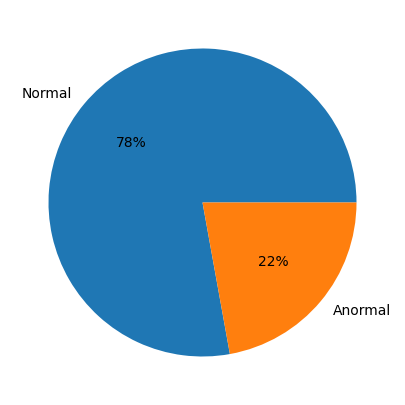

In [8]:
# 3 - DISTRIBUCION DE FRECUENCIAS DEL TARGET
a, b = data['Target'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.0f%%")
print(data["Target"].value_counts())

<ipython-input-9-3f293c48b293>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


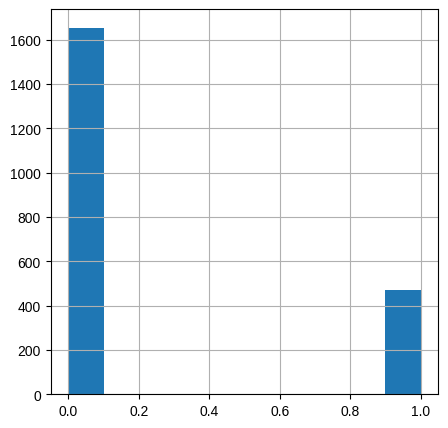

In [9]:
# 3 - HISTOGRAMA
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.style.use("seaborn")
data['Target'].hist(ax=ax);

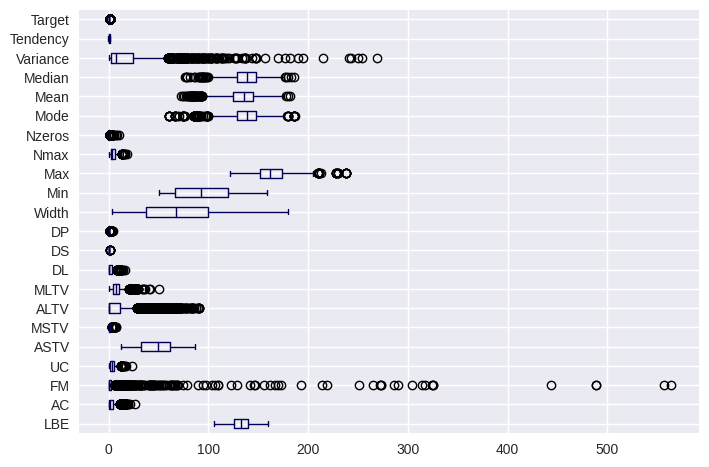

In [10]:
# BOX PLOT
data_box_plot = data.boxplot(vert=False, color = "#000054")

*   Podemos ver que en este dataset tenemos un total de 2126 entradas, sin elementos nulos en ninguna de ellas.  
*   Observamos una distribución de nuestra variable objetivo, "Target" con un 78% de los fetos normales respecto a un 22% anormal.
*   Podemos observar eb el gráfico que tenemos varias variables con valores fuera del rango.
*   Mediante describe, hemos obtenido información estadística útil de cada una de las variables.




## 1 - Clasifique cada variable según su tipo, cualitativa o cuantitativa discreta o contínua.


*   **Variable Cualitativa:** Su valor es una categoria.
*   **Variable Cuantitativa:**
  *   Cuantitativa continua: Valores válidos entre dos valores establecidos.
  *   Cuantitativa discreta: El valor es único, no existe valor intermedio entre dos valores.








# CLASSIFICACIÓN VARIABLES

### Cualitativas

* **Target**: Estado fetal.
Todas las variables están representadas por números, sin embargo, la variable Target, es dicotómica, ya que los valores son "normal" o "anormal".

* **Tendency**: Tendencia del histograma. Esta variable es cualitativa pero que ha sido transformada a cuantitativa discreta y se ha codificado en -1 (decreciente), 0 (neutra) y 1 (creciente).

### Cuantitativas Continuas
* **LBE**: Frecuencia cardíaca basal fetal (latidos por minuto)
* **FM**: Número de movimientos fetales por segundo
* **ASTV**: Porcentaje de tiempo con variabilidad a corto plazo anormal
* **MSTV**: Valor medio de la variabilidad a corto plazo
* **ALTV**: Porcentaje de tiempo con variabilidad a largo plazo anormal
* **MLTV**: Valor medio de la variabilidad a largo plazo
* **Width**: Ancho del histograma de la frecuencia cardíaca fetal (FHR)
* **Min**: Mínimo (frecuencia baja) del histograma de FHR
* **Max**: Máximo (frecuencia alta) del histograma de FHR
* **Mode**: Moda del histograma
* **Mean**: Media del histograma
* **Median**: Mediana del histograma
* **Variance**: Varianza del histograma

### Cuantitativas Discretas
* **AC**: Número de aceleraciones por segundo
* **UC**: Número de contracciones uterinas por segundo
* **DL**: Número de deceleraciones leves por segundo
* **DS**: Número de deceleraciones severas por segundo
* **DP**: Número de deceleraciones prolongadas por segundo
* **Nmax**: Número de picos en el histograma
* **Nzeros**: Número de ceros en el histograma


## 2 -  ¿Cuál es la proporción de estados fetales normales? ¿y anormales?

0    1655
1     471
Name: Target, dtype: int64


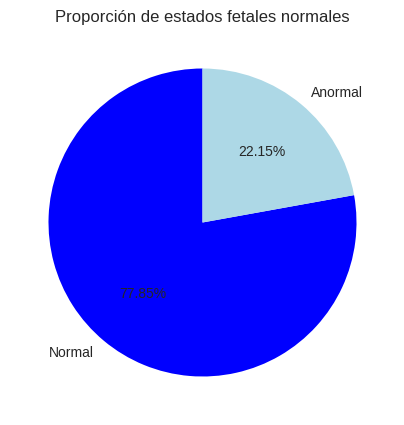

In [11]:
# Obtenemos los valores de estados fatales
datosFetos = data['Target'].value_counts()
print(datosFetos)
etiquetas = ['Normal', 'Anormal']
colores = ['blue', 'lightblue']
plt.figure(figsize=(5, 5))

# configuramos el gráfico
plt.pie(datosFetos, labels = etiquetas, colors = colores, startangle = 90, autopct='%1.2f%%' )

# Etiquetamos
plt.title ('Proporción de estados fetales normales')

# Mostramos el gráfico
plt.show()

La proporción es de 77,85% de fetos normales frente al 22,15% anormales.

## 3 -  Obtenga las medidas de centralización, localización y dispersión para las variables:  FM, ALTV y Median.

### VARIABLE FM

In [12]:
# Extraemos la variable deseada
variableFM = data["FM"]

In [13]:
# Medidas de centralización
media = variableFM.mean()
mediana = variableFM.median()
moda = variableFM.mode()
centralizacion = pd.Series({"Media": media, "Mediana": mediana, "Moda": moda})
centralizacion

Media                           7.241298
Mediana                              0.0
Moda       0    0
Name: FM, dtype: int64
dtype: object

In [14]:
# Medidas de localización
min = variableFM.min()
p05 = variableFM.quantile(0.05)
p25 = variableFM.quantile(0.25)
p50 = variableFM.quantile(0.50)
p75 = variableFM.quantile(0.75)
p95 = variableFM.quantile(0.95)
max = variableFM.max()

localizacion = pd.Series({"Minimo": min, "5%": p05, "25%": p25, "50%": p50, "75%": p75, "95%": p95, "Max": max})
localizacion

Minimo      0.0
5%          0.0
25%         0.0
50%         0.0
75%         2.0
95%        22.0
Max       564.0
dtype: float64

In [15]:
# Medidas de dispersión
std = variableFM.std() # Desviación típica
rango = variableFM.max() - variableFM.min() # El rango es el valor máximo menos el mínimo
iqr = variableFM.quantile(0.75) - variableFM.quantile(0.25) # El IQR es la diferencia entre el tercer y el primer cuartil
cofva = variableFM.std(ddof=0) / variableFM.mean() #desviación típica sobre la media, medida de comparación entre dos muestras

dispersion = pd.Series({"Desviación Típica": std, "Rango": rango, "IQR": iqr, "Coeficiente Variación": cofva})
dispersion

Desviación Típica         37.125309
Rango                    564.000000
IQR                        2.000000
Coeficiente Variación      5.125680
dtype: float64

Podemos crear un box plot para visualizar estos valores.

Text(0.5, 1.0, 'FM - centralización, localización y dispersión')

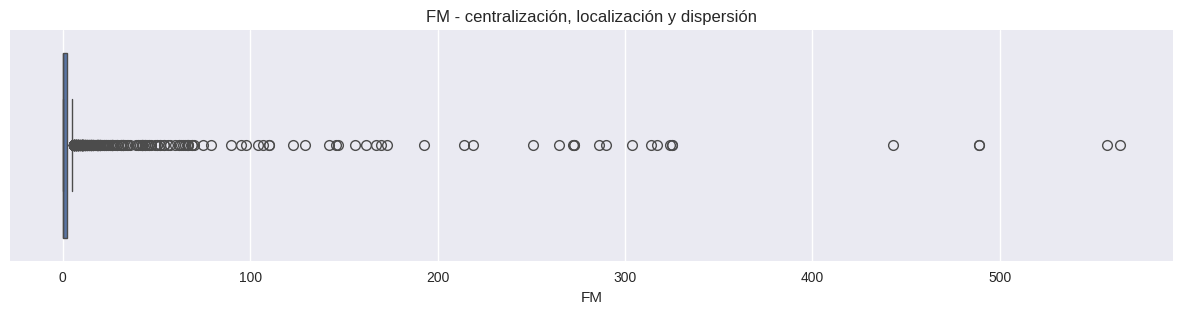

In [16]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=data["FM"])
plt.title('FM - centralización, localización y dispersión')

### VARIABLE ALTV

In [17]:
# Extraemos la variable deseada
variableALTV = data["ALTV"]

In [18]:
# Medidas de centralización
media = variableALTV.mean()
mediana = variableALTV.median()
moda = variableALTV.mode()
centralizacion = pd.Series({"Media": media, "Mediana": mediana, "Moda": moda})
centralizacion

Media                              9.84666
Mediana                                0.0
Moda       0    0
Name: ALTV, dtype: int64
dtype: object

In [19]:
# Medidas de localización
min = variableALTV.min()
p05 = variableALTV.quantile(0.05)
p25 = variableALTV.quantile(0.25)
p50 = variableALTV.quantile(0.50)
p75 = variableALTV.quantile(0.75)
p95 = variableALTV.quantile(0.95)
max = variableALTV.max()

localizacion = pd.Series({"Minimo": min, "5%": p05, "25%": p25, "50%": p50, "75%": p75, "95%": p95, "Max": max})
localizacion

Minimo     0.0
5%         0.0
25%        0.0
50%        0.0
75%       11.0
95%       56.0
Max       91.0
dtype: float64

In [20]:
# Medidas de dispersión
std = variableALTV.std() # Desviación típica
rango = variableALTV.max() - variableALTV.min() # El rango es el valor máximo menos el mínimo
iqr = variableALTV.quantile(0.75) - variableALTV.quantile(0.25) # El IQR es la diferencia entre el tercer y el primer cuartil
cofva = variableALTV.std(ddof=0) / variableALTV.mean() #desviación típica sobre la media, medida de comparación entre dos muestras

dispersion = pd.Series({"Desviación Típica": std, "Rango": rango, "IQR": iqr, "Coeficiente Variación": cofva})
dispersion

Desviación Típica        18.396880
Rango                    91.000000
IQR                      11.000000
Coeficiente Variación     1.867898
dtype: float64

Podemos crear un box plot para visualizar estos valores.

Text(0.5, 1.0, 'ALTV - centralización, localización y dispersión')

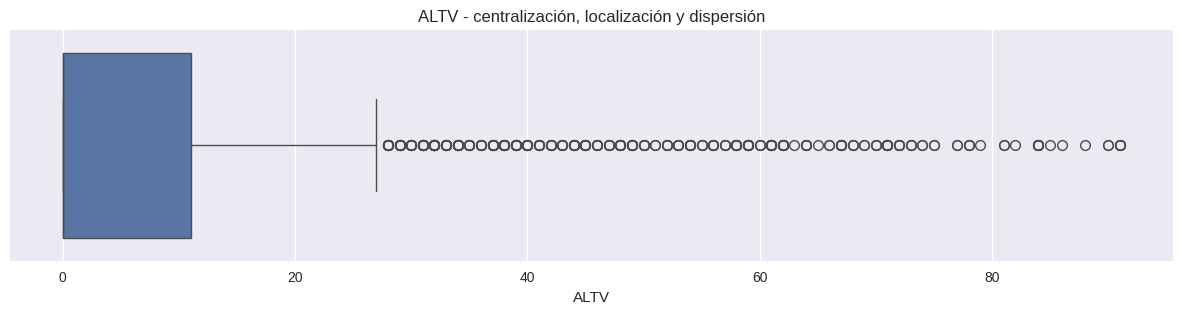

In [21]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=data["ALTV"])
plt.title('ALTV - centralización, localización y dispersión')

### VARIABLE Median

In [22]:
# Extraemos la variable deseada
variableMedian = data["Median"]

In [23]:
# Medidas de centralización
media = variableMedian.mean()
mediana = variableMedian.median()
moda = variableMedian.mode()
centralizacion = pd.Series({"Media": media, "Mediana": mediana, "Moda": moda})
centralizacion

Media                                138.09031
Mediana                                  139.0
Moda       0    146
Name: Median, dtype: int64
dtype: object

In [24]:
# Medidas de localización
min = variableMedian.min()
p05 = variableMedian.quantile(0.05)
p25 = variableMedian.quantile(0.25)
p50 = variableMedian.quantile(0.50)
p75 = variableMedian.quantile(0.75)
p95 = variableMedian.quantile(0.95)
max = variableMedian.max()

localizacion = pd.Series({"Minimo": min, "5%": p05, "25%": p25, "50%": p50, "75%": p75, "95%": p95, "Max": max})
localizacion

Minimo     77.0
5%        113.0
25%       129.0
50%       139.0
75%       148.0
95%       159.0
Max       186.0
dtype: float64

In [25]:
# Medidas de dispersión
std = variableMedian.std() # Desviación típica
rango = variableMedian.max() - variableMedian.min() # El rango es el valor máximo menos el mínimo
iqr = variableMedian.quantile(0.75) - variableMedian.quantile(0.25) # El IQR es la diferencia entre el tercer y el primer cuartil
cofva = variableMedian.std(ddof=0) / variableMedian.mean() #desviación típica sobre la media, medida de comparación entre dos muestras

dispersion = pd.Series({"Desviación Típica": std, "Rango": rango, "IQR": iqr, "Coeficiente Variación": cofva})
dispersion

Desviación Típica         14.466589
Rango                    109.000000
IQR                       19.000000
Coeficiente Variación      0.104737
dtype: float64

Podemos crear un box plot para visualizar estos valores.

Text(0.5, 1.0, 'Median - centralización, localización y dispersión')

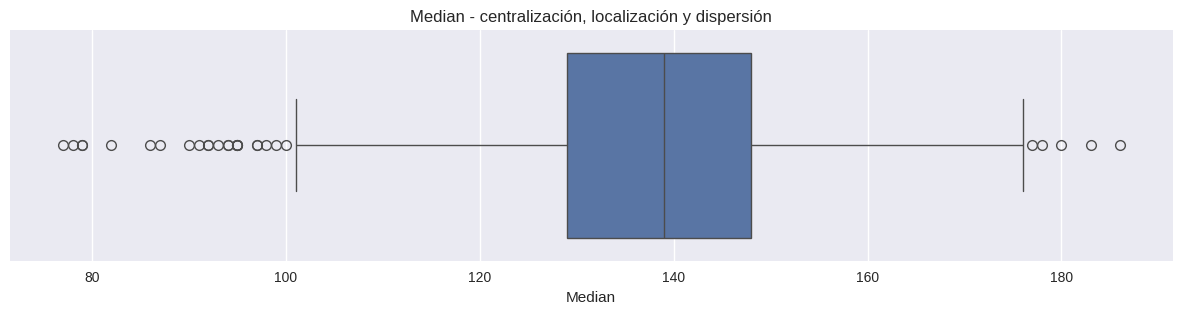

In [26]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=data["Median"])
plt.title('Median - centralización, localización y dispersión')

## Enumere las 3 variables explicativas que presentan mayor correlación con el target.
Las variables con mayor correlación serán las que su correlación sea más cercana a 1.
Creamos un mapa de correlación para poder analizar las variables respecto al target.

<Axes: >

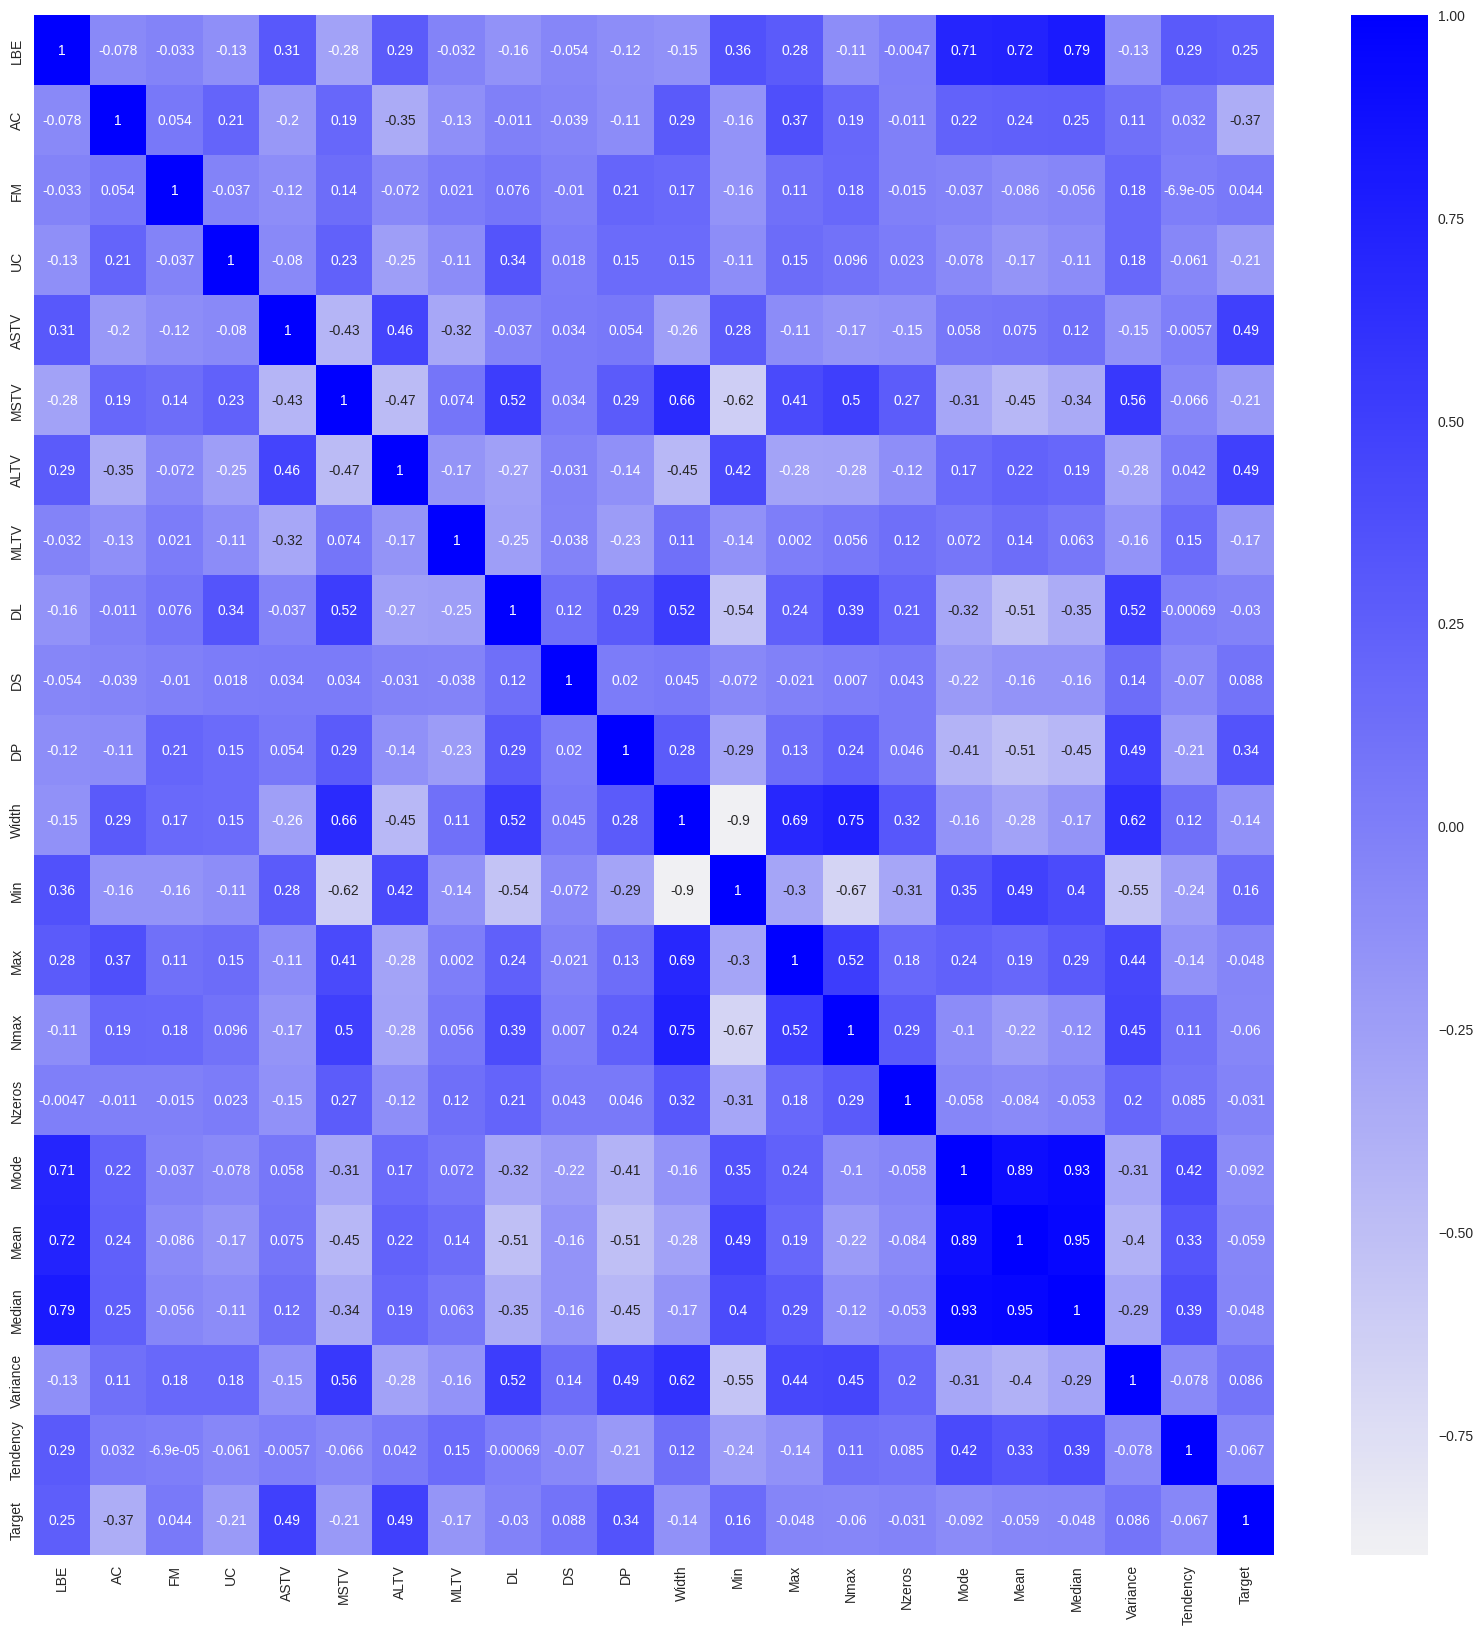

In [27]:
# CLASE 2

# 3 - MATRIZ DE CORRELACIONES
plt.figure(figsize=(20,20))
corr = data.corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)


La última columna es la que nos da la correlación de las variables con el target.

<ipython-input-28-4671023c2b14>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Target', y = 'LBE', data = data, palette='Blues')
<ipython-input-28-4671023c2b14>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Target', y = 'ASTV', data = data, palette='Blues')
<ipython-input-28-4671023c2b14>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Target', y = 'ALTV', data = data, palette='Blues')
<ipython-input-28-4671023c2b14>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

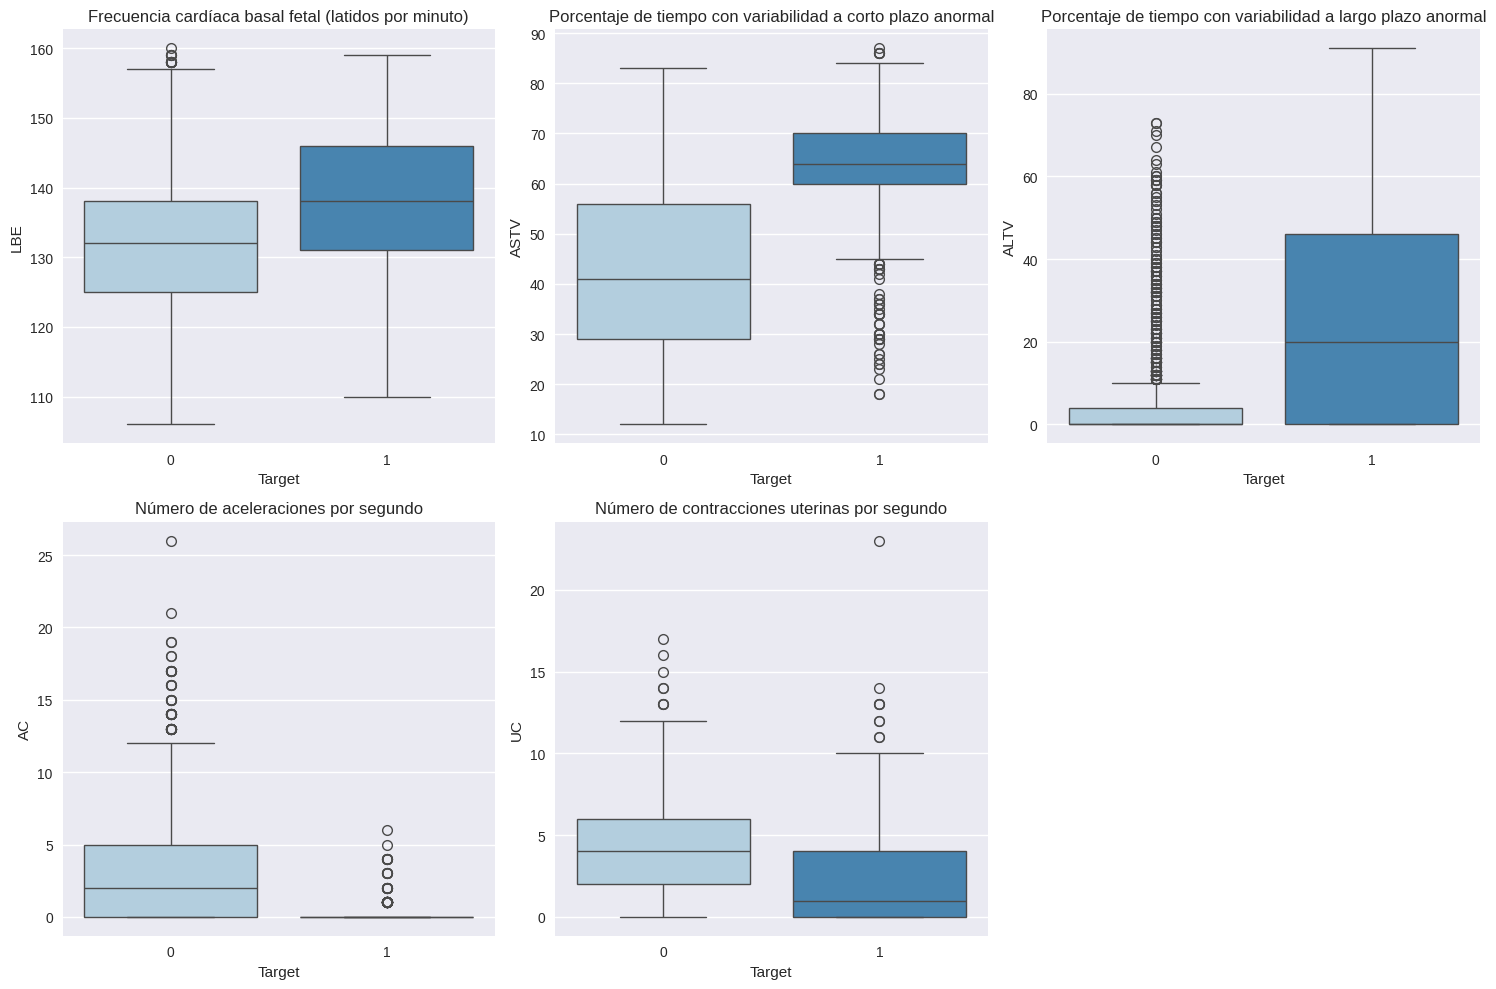

In [28]:
# RELACIÓN DE LAS VARIABLES CON EL TARGET

plt.figure(figsize=(15,10))
plt.subplot(2, 3, 1)
sns.boxplot(x = 'Target', y = 'LBE', data = data, palette='Blues')
plt.title('Frecuencia cardíaca basal fetal (latidos por minuto)')

plt.subplot(2, 3, 2)
sns.boxplot(x = 'Target', y = 'ASTV', data = data, palette='Blues')
plt.title('Porcentaje de tiempo con variabilidad a corto plazo anormal')

plt.subplot(2, 3, 3)
sns.boxplot(x = 'Target', y = 'ALTV', data = data, palette='Blues')
plt.title('Porcentaje de tiempo con variabilidad a largo plazo anormal')

plt.subplot(2, 3, 4)
sns.boxplot(x = 'Target', y = 'AC', data = data, palette='Blues')
plt.title('Número de aceleraciones por segundo')

plt.subplot(2, 3, 5)
sns.boxplot(x = 'Target', y = 'UC', data = data, palette='Blues')
plt.title('Número de contracciones uterinas por segundo')
plt.tight_layout()
plt.show()

Estas son las variables con una correlación mas interesante respecto a la variable objetivo Target.
Podemos observar que las variables con una mayor correlación són:

*   **ASTV**
*   **AC**
*   **ALTV**


# Cree un conjunto de entrenamiento y otro de test a partir del conjunto inicial de datos donde el conjunto de entrenamiento contenga el 60% de las observaciones.


In [30]:
# MUESTREO
# ENTRENAMIENTO Y TEST

from sklearn.model_selection import train_test_split

#Sacamos dos sub dataset con los datos que queremos
X = data.drop('Target',axis=1) #  variables explicativas
y = data['Target'] #  variable objetivo

# cogemos el 40% para test y el 60% para entrenar. La semilla a 0 para que se mantenga constante.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 1716 to 1653
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       1275 non-null   int64  
 1   AC        1275 non-null   int64  
 2   FM        1275 non-null   int64  
 3   UC        1275 non-null   int64  
 4   ASTV      1275 non-null   int64  
 5   MSTV      1275 non-null   float64
 6   ALTV      1275 non-null   int64  
 7   MLTV      1275 non-null   float64
 8   DL        1275 non-null   int64  
 9   DS        1275 non-null   int64  
 10  DP        1275 non-null   int64  
 11  Width     1275 non-null   int64  
 12  Min       1275 non-null   int64  
 13  Max       1275 non-null   int64  
 14  Nmax      1275 non-null   int64  
 15  Nzeros    1275 non-null   int64  
 16  Mode      1275 non-null   int64  
 17  Mean      1275 non-null   int64  
 18  Median    1275 non-null   int64  
 19  Variance  1275 non-null   int64  
 20  Tendency  1275 non-null   i

In [31]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1275 entries, 1716 to 1653
Series name: Target
Non-Null Count  Dtype
--------------  -----
1275 non-null   int64
dtypes: int64(1)
memory usage: 19.9 KB


Podemos observar que ya tenemos nuestro conjunto de datos de entrenamiento creado. Hay un total de 1275 registros de entrenamiento.

# A partir del conjunto de entrenamiento ajuste un modelo a partir del algoritmo de Naive Bayes.

Utilizaremos el algoritmo de Naive Bayes Gaussiano. Utilizamos este algoritmo ya que la mayoria de variables que tenemos són continuas.

In [32]:
# MODELIZACION CON NVG
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

modelNB = gnb.fit(X_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(X_train)
y_pred_test = modelNB.predict_proba(X_test)


# Obtenga la curva ROC y el área bajo la curva para los conjuntos de entrenamiento y test.

In [33]:
# # VALIDACION
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# CURVA ROC Y AUC PARA TRAINING
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# CURVA ROC Y AUC PARA TEST
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)


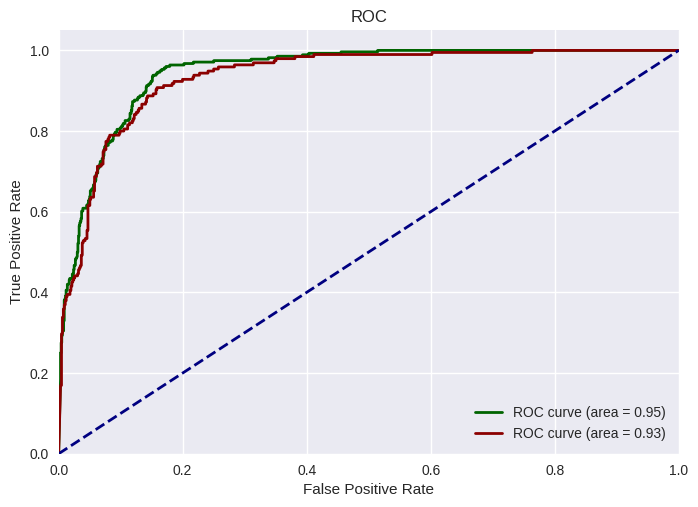

In [34]:
# GRAFICA
plt.figure()
lw = 2

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Podemos observar que el modelo que hemos ajustado tiene algo de sobreajuste, ya que la curva de entrenamiento es de 0.95 respecto a los 0.93 del test. Esta diferencia no representa un sobreajuste elevado.
Al tener unos valores cercanos a 1, significa que tenemos un modelo bastante bueno.

## MODELIZACIÓN ELIMINANDO LA VARIABLE TENDENCY (Variable cualitativa transformada)

La variable Tendency ha sido transformada a cuantitativa discreta y se classificado en -1, 0 y 1. Probamos de eliminarla para ver el rendimiento del modelo.

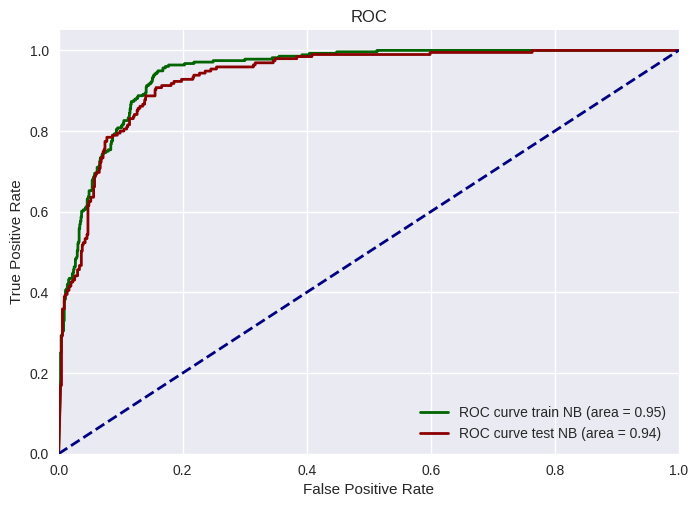

In [35]:
# MUESTREO, CREACIÓN DEL CONJUNTO DE ENTRENAMIENTO
from sklearn.model_selection import train_test_split

drop_columns = ['Tendency', 'Target']
#Sacamos dos sub dataset con los datos que queremos
y_2 = data['Target'] #  variable objetivo
X_2 = data.drop(drop_columns,axis=1) #  variables explicativas menos tendency

# cogemos el 40% para test y el 60% para entrenar. La semilla a 0 para que se mantenga constante.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.40, random_state=0)

# MODELIZACIÓN CON NAIVE BAYES GAUSSIAN

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Usamos y_train.values.ravel() para que no "proteste" en entrenamiento
modelNB = gnb.fit(X_train2, y_train2.values.ravel())

#SACAMOS DE LA Y PREDICHA LA PROBABILIDAD PARA TRAIN
y_pred_trainNB = modelNB.predict_proba(X_train2)

#SACAMOS DE LA Y PREDICHA LA PROBABILIDAD PARA TEST
y_pred_testNB= modelNB.predict_proba(X_test2)

# VALIDACIÓN

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# CURVA ROC Y AUC PARA EL CONJUNTO DE ENTRENAMIENTO
fpr_trainNB, tpr_trainNB, _ = roc_curve(y_train2, y_pred_trainNB[:, 1])
roc_auc_trainNB = auc (fpr_trainNB, tpr_trainNB)

# CURVA ROC Y AUC PARA EL CONJUNTO DE TEST
fpr_testNB, tpr_testNB, _ = roc_curve(y_test2, y_pred_testNB[:, 1])
roc_auc_testNB = auc (fpr_testNB, tpr_testNB)

# GRAFICA
plt.figure()
lw = 2

plt.plot(fpr_trainNB,tpr_trainNB,color="darkgreen",lw=lw,label="ROC curve train NB (area = %0.2f)" % roc_auc_trainNB,)
plt.plot(fpr_testNB,tpr_testNB,color="darkred",lw=lw,label="ROC curve test NB (area = %0.2f)" % roc_auc_testNB,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Eliminar la variable tendency ha hecho que el mejor obtenga mejores resultados, ya que hemos conseguido reducir el sobreajuste al augmentar la ROC del AUC del test.

## A partir del conjunto de entrenamiento y test creados en el segundo sprint, ajuste un modelo utilizando el algoritmo SVM dejando los valores por defecto.

Para tener unos valores del SVM por defecto, debemos de assignar a la probabilidad el valor True.

In [36]:
# MODELIZACIÓN DEL SVM CON VALORES POR DEFECTO

from sklearn import svm
from sklearn.svm import SVC

# SVM Lineal
svmLineal = svm.SVC(probability = True)

# Ajuste del modelo
svmLineal.fit(X_train, y_train)

# VALIDACION CON EL CONJUNTO DE TEST
y_proba_train_svm_def = svmLineal.predict_proba(X_train)
y_proba_test_svm_def = svmLineal.predict_proba(X_test)

## Obtenga la curva ROC y el área bajo la curva para los conjuntos de entrenamiento y test.

In [37]:
# VALIDACIÓN

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Conjunto train
fpr_train_svm_def, tpr_train_svm_def, _ = roc_curve(y_train, y_proba_train_svm_def[:, 1])
roc_auc_train_svm_def = auc(fpr_train_svm_def, tpr_train_svm_def)

# Conjunto Test
fpr_test_svm_def, tpr_test_svm_def, _ = roc_curve(y_test, y_proba_test_svm_def[:, 1])
roc_auc_test_svm_def = auc(fpr_test_svm_def, tpr_test_svm_def)

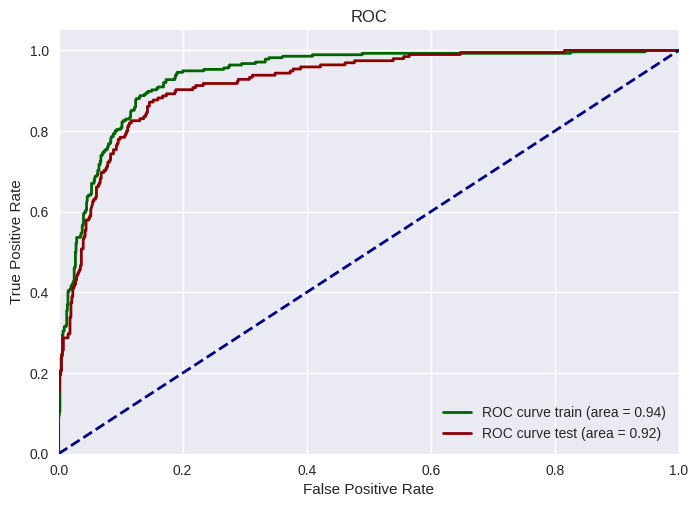

In [38]:
# Curva ROC y AUC
plt.figure()
lw = 2

plt.plot(fpr_train_svm_def,tpr_train_svm_def,color="darkgreen",lw=lw,label="ROC curve train (area = %0.2f)" % roc_auc_train_svm_def,)
plt.plot(fpr_test_svm_def,tpr_test_svm_def,color="darkred",lw=lw,label="ROC curve test (area = %0.2f)" % roc_auc_test_svm_def,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Como podemos comparar, este modelo de SVM realizado con los parametros por defecto, tiene unos valores de ROC peores que previamente. El modelo tiene un poco de sobreajuste.

## Compare en la misma gráfica, la curva ROC y el AUC para el conjunto de test clasificado con Naive Bayes y con SVM.

Como hemos observado que los valores por defecto no han mejorado los resultados anteriores, vamos a crear un modelo SVM lineal.

In [39]:
# MODELIZACIÓN CON SVM

from sklearn import svm
from sklearn.svm import SVC

# SVM Lineal
svmLineal = svm.SVC(C = 1
                    ,kernel='linear'
                    ,degree = 1
                    ,probability = True)

# Ajuste del modelo
svmLineal.fit(X_train, y_train)

# VALIDACION
y_proba_train_svm = svmLineal.predict_proba(X_train)
y_proba_test_svm = svmLineal.predict_proba(X_test)

# Conjunto train
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

# Conjunto test
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

### COMPARACIÓN

La idea es comparar los resultados obtenidos con el modelo de Naive Bayes respecto al modelo de SVM.

*   Los valores obtenidos con el modelo de Naive Bayes eran de una área bajo la curva de 0.94 para test y 0.95 para el train.
*   En este modelo de SVM vamos a utilizar un kernel lineal y un parámetro de C de 1.


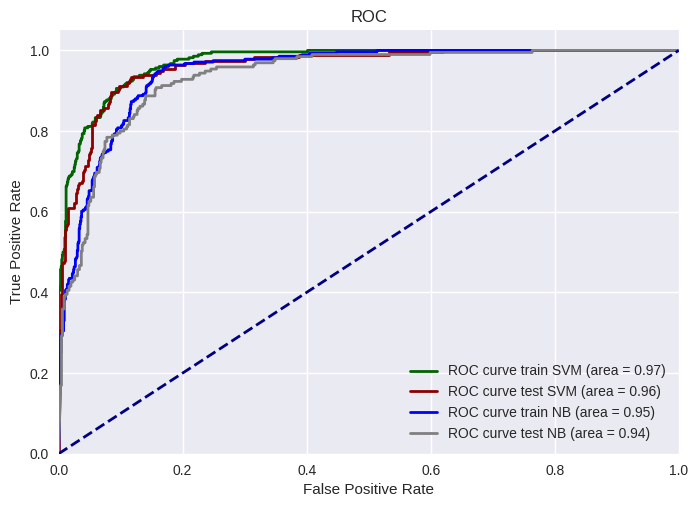

In [40]:
# COMPARACIÓN ENTRE NAIVE BAYES Y SVM
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve train SVM (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve test SVM (area = %0.2f)" % roc_auc_test_svm,)
plt.plot(fpr_trainNB,tpr_trainNB,color="blue",lw=lw,label="ROC curve train NB (area = %0.2f)" % roc_auc_trainNB,)
plt.plot(fpr_testNB,tpr_testNB,color="grey",lw=lw,label="ROC curve test NB (area = %0.2f)" % roc_auc_testNB,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

## CONCLUSIONES

Como podemos observar en el gráfico, ambos modelos ajustan bien, pero el modelo de SVM es algo mejor al estar sus valores del AUC más cerca al 1.
Ambos modelos sobreajustan ligeramente ya que solo existe una diferencia de 0.01 entre el valor del test y el de train.

# PRACTICAS FINALES

### Modificar los hiperparametros

Vamos a intentar obtener unos mejores resultados para la curva Roc y el AUC.
Probaremos utilizando unos valores distintos de los hiperparametros. Probaremos manteniendo el kernel linear, pero cambiando el valor de C.

In [41]:
# MODELIZACIÓN CON SVM

from sklearn import svm
from sklearn.svm import SVC

# SVM Lineal
svmLineal_1 = svm.SVC(C = 10
                    ,kernel='linear'
                    ,degree = 1
                    ,probability = True)

# Ajuste del modelo
svmLineal_1.fit(X_train, y_train)

# VALIDACION
y_proba_train_svm = svmLineal_1.predict_proba(X_train)
y_proba_test_svm = svmLineal_1.predict_proba(X_test)

# Conjunto train
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

# Conjunto test
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

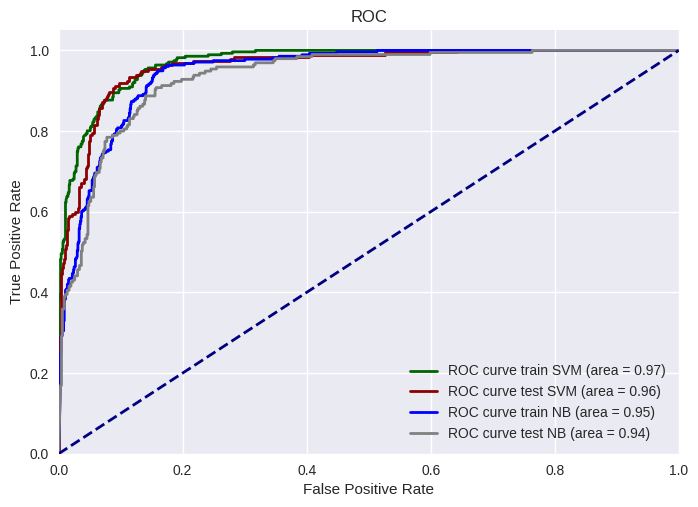

In [42]:
# COMPARACIÓN ENTRE NAIVE BAYES Y SVM
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve train SVM (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve test SVM (area = %0.2f)" % roc_auc_test_svm,)
plt.plot(fpr_trainNB,tpr_trainNB,color="blue",lw=lw,label="ROC curve train NB (area = %0.2f)" % roc_auc_trainNB,)
plt.plot(fpr_testNB,tpr_testNB,color="grey",lw=lw,label="ROC curve test NB (area = %0.2f)" % roc_auc_testNB,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

He probado con valores de C distintos, y los resultados del modelo SVM no han mejorado. Contrariamente, como menor era el valor de C, peor són los valores obtenidos.

### Optimizar modelo mediante GridSeachC

In [43]:
from sklearn.model_selection import GridSearchCV

# Hiperparametros
param_grid = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [0.1,1,10]},
    {"kernel": ["linear"], "C": [0.1,1,10]},
    {"kernel": ["poly"], "C": [0.1,1,10], "degree": [2,3]},
]

grid = GridSearchCV(
        estimator  = SVC(),
        param_grid = param_grid,
        scoring    = 'roc_auc', # roc_auc, accuracy
        n_jobs     = -1,
        cv         = 3,
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
modelgrid = grid.fit(X = X_train, y = y_train)

# Resultados del grid

resultados = pd.DataFrame(modelgrid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(15)

,param_C,param_gamma,param_kernel,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
7,1,NaN,linear,NaN,0.961140,0.009888,0.971758,0.004486
5,10,0.0001,rbf,NaN,0.960422,0.005075,0.982315,0.001190
6,0.1,NaN,linear,NaN,0.959171,0.011102,0.968995,0.006302
8,10,NaN,linear,NaN,0.957626,0.012830,0.971892,0.004544
3,1,0.0001,rbf,NaN,0.949020,0.008383,0.962050,0.001849
4,10,0.001,rbf,NaN,0.947823,0.005539,0.998932,0.000856
2,1,0.001,rbf,NaN,0.944961,0.004728,0.988773,0.000816
14,10,NaN,poly,3,0.942557,0.010176,0.952633,0.005858
13,10,NaN,poly,2,0.937084,0.009289,0.944851,0.004812
1,0.1,0.0001,rbf,NaN,0.929805,0.012450,0.935924,0.003403


Estos son los mejores parametros para el modelo SVM, SVC:

In [44]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')


La optimización del modelo da como resultado que los parámetros más optimos para el modelo de SVM, són los parámetros usados inicialmente por defecto.
El kernel debe ser lineal y el valor C = 1

### Reducir Variables. Utilizar variables significativas.

Probamos de reducir variables y eliminar las variables con una correlación menor a la variable objetivo.

In [45]:
# MUESTREO
# ENTRENAMIENTO Y TEST

drop_columns_2 = ['Tendency', 'Target','FM','DL','DS','Max','Nmax','Nzeros','Mode','Mean','Median','Variance','Tendency']
#Sacamos dos sub dataset con los datos que queremos
X_3 = data.drop(drop_columns_2,axis=1) #  variables explicativas reducidas
y_3 = data['Target'] #  variable objetivo

# cogemos el 40% para test y el 60% para entrenar. La semilla a 0 para que se mantenga constante.
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_3, test_size=0.40, random_state=0)

# MODELIZACIÓN CON SVM

from sklearn import svm
from sklearn.svm import SVC

# SVM Lineal
svmLineal = svm.SVC(C = 1
                    ,kernel='linear'
                    ,degree = 1
                    ,probability = True)

# Ajuste del modelo
svmLineal.fit(X_train3, y_train3)

# VALIDACION
y_proba_train_svm = svmLineal.predict_proba(X_train3)
y_proba_test_svm = svmLineal.predict_proba(X_test3)

# Conjunto train
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train3, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

# Conjunto test
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test3, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

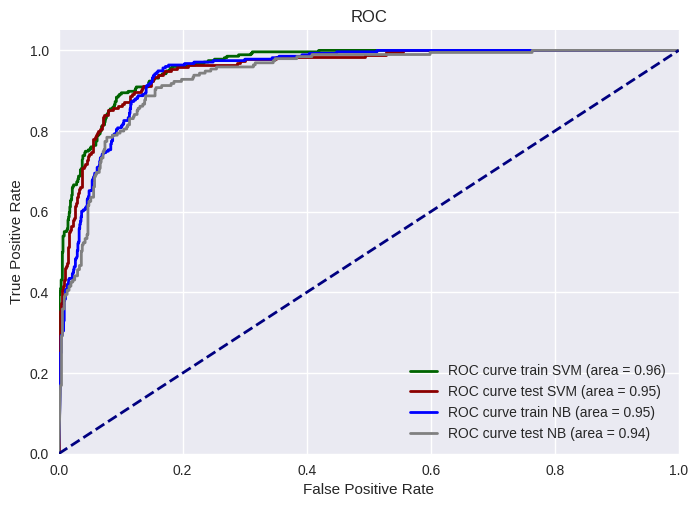

In [46]:
# COMPARACIÓN ENTRE SVM
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve train SVM (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve test SVM (area = %0.2f)" % roc_auc_test_svm,)
plt.plot(fpr_trainNB,tpr_trainNB,color="blue",lw=lw,label="ROC curve train NB (area = %0.2f)" % roc_auc_trainNB,)
plt.plot(fpr_testNB,tpr_testNB,color="grey",lw=lw,label="ROC curve test NB (area = %0.2f)" % roc_auc_testNB,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

### CONCLUSIONES

Hemos probado eliminando variables con poca correlación a la variable objetivo Target. En este caso los valores obtenidos para la metrica ROC són peores que previamente.

Podriamos probar de tratar de eliminar otras variables y trabajar con las mas signifcativas hasta ver con cuales obtenemos mejores resultados.

Hemos observado que algunas variables tienen bastantes outliers, como el caso de la variable AC. Podemos probar de trabajar los outliers y trabajar con percentiles. Un percentil 90 o 95, podria ser una buena idea para probar de reducir el error del modelo.